In [1]:
import random 
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import library_data_science as lds

# Introduction to Two-Dimentional Data (2D)

Two-dimensional data can be represented as an array of tuples, where each tuple consists of two elements. In this structure, the first element in each tuple is treated as independent, while the second element typically depends on the first, reflecting the relationship between the two variables. \
Remember that `D.size = n`.

$$D = \bigg< (x_0, y_0), (x_1, y_1), (x_2, y_2), ... , (x_{n-1}, y_{n-1}) \bigg>,$$
$$D =  \bigg< (d_{00}, d_{01}), (d_{10}, d_{11}), (d_{20}, d_{21}), ... , (d_{(n-1)0}, d_{(n-1)1}) \bigg>,$$
$$D = \bigg< (X[0], Y[0]), (X[1], Y[1]), (X[2], Y[2]), ... , (X[n-1], Y[n-1]), \bigg>, $$
$$D = \bigg< (D[0][0], D[0][1]), (D[1][0], D[1][1]), (D[2][0], D[2][1]), ... , (D[n-1][0], D[n-1][1]), \bigg>$$

Two-dimentional dataset can be unzipped to the two separated sets.

$$X = \big< x_0, x_1, ... , x_{n-1} \big> = \big< d_{00}, d_{10}, ... , d_{(n-1)0} \big> = \big< X[0], X[1], ... , X[n-1] \big> = \big< D[0][0], D[1][0], ... , D[n-1][0] \big> $$
$$Y = \big< y_0, y_1, ... , y_{n-1} \big> = \big< d_{01}, d_{11}, ... , d_{(n-1)1} \big> = \big< Y[0], Y[1], ... , Y[n-1] \big> = \big< D[0][1], D[1][1], ... , D[n-1][1] \big>$$

For every two-dimentional data `D.size = X.size = Y.size`.


To demonstrate the difference, I will use the example I used in the presentation to explain what one-dimensional data are.

* When examining the distances covered by runners during a 5-minute run, our data will consist of the distances they ran. $$Distances = \big< 1078, 896, 1196, 1009, 1078, 1096, 923 \big>$$
* When studying the relationship between height and body weight in humans, one-dimensional data would separately represent height and weight. $$Weights = \big< 60, 76, 99, 48 \big>$$ $$Heights = \big< 177, 189, 197, 165 \big>$$ If we were to create a database combining the height and weight of each individual, we would then be dealing with **two-dimensional data**. $$Weights\_Heights = \big< (60, 177), (76, 189), (99, 197), (48, 165) \big>$$

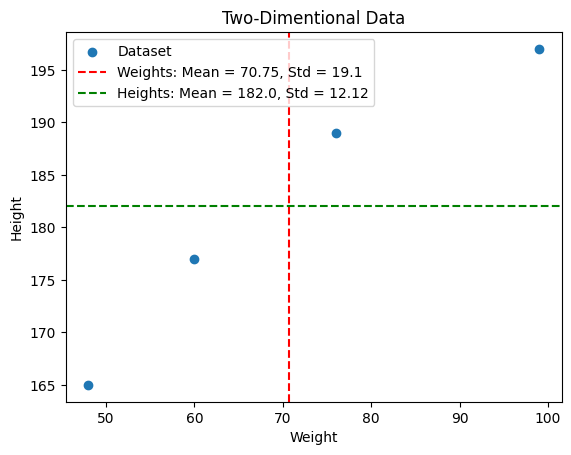

In [2]:
weights = [60, 76, 99, 48]
heights = [177, 189, 197, 165]

weights_mean = lds.mean(weights)
heights_mean = lds.mean(heights)

weights_std = lds.std(weights)
heights_std = lds.std(heights)

plt.scatter(weights, heights, label = 'Dataset')
plt.axvline(
    weights_mean,
    linestyle = '--',
    color = 'red',
    label = f'Weights: Mean = {np.round(weights_mean, 2)}, Std = {np.round(weights_std, 2)}'
)
plt.axhline(
    heights_mean,
    linestyle = '--',
    color = 'green',
    label = f'Heights: Mean = {np.round(heights_mean, 2)}, Std = {np.round(heights_std, 2)}'
)
plt.legend()
plt.title('Two-Dimentional Data')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

At this stage, analyzing a single variable of data is not a problem. However, my goal here is to expand the concepts of analysis towards examining two variables together.

# Fitting Curves to Data

Fitting a curve to two-dimensional data brings certain benefits for data analysis.

* Allow us to **explain phenomena**.

* **Make predictions** about behaviour in new settings.

* Provides **estimations** for unpredictable datasets.

In [3]:
# Dataset
X = np.linspace(-10, 10, 30)
Y = 3 * X**2 + 2 * X + 5 + np.random.normal(0, 10, 30)

# Predictions
Y_1 = [ 30 * x for x in X ]
Y_2 = [ -25 * x + 5 for x in X ]
Y_3 = [ 150 for x in X ]
Y_4 = [ 2 * x ** 2 + 3 * x + 15 for x in X ]
Y_5 = [ 3 * x ** 2 + 2 * x + 5 for x in X ]

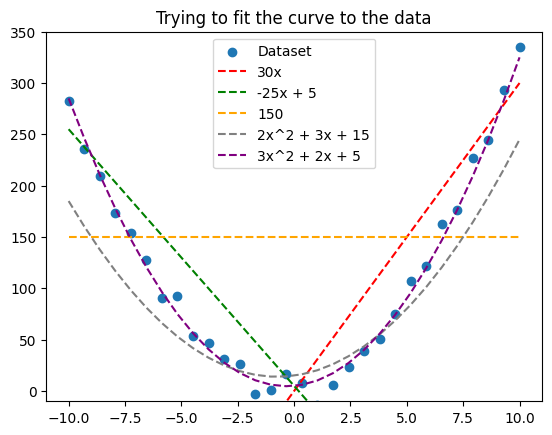

In [4]:
plt.scatter(X, Y, label = 'Dataset')
plt.plot(X, Y_1, color = 'red', linestyle = '--', label = '30x')
plt.plot(X, Y_2, color = 'green', linestyle = '--', label = '-25x + 5')
plt.plot(X, Y_3, color = 'orange', linestyle = '--', label = '150')
plt.plot(X, Y_4, color = 'gray', linestyle = '--', label = '2x^2 + 3x + 15')
plt.plot(X, Y_5, color = 'purple', linestyle = '--', label = '3x^2 + 2x + 5')
plt.title('Trying to fit the curve to the data')
plt.legend()
plt.ylim([-10, 350])
plt.show()

To simplify future operations, I will use a self-made function that returns a polynomial function.

In [5]:
def polynomial(x, factors):
    """Function returns the value for the given polynomial.
    
       Variable `factors` should contain the factors of the polynomial.
    
       For example for 3x^3 - 8x - 1, factors = (3, 0, -8, -1).

       For example for 0.5x^2 + 3x - 5, factors = (0.5, 3, -5)."""

    counter = 0

    for i in range(len(factors)):
        counter = counter + ( factors[i] * (x ** (len(factors) - i - 1)) )
    
    return counter

To determine which curve best describes the data, we need an **objective function** that measures how well the curve fits the data. Once we find it, our task is to optimize it to its minimum.

### Measurements for Best Fit

By creating two-dimensional data, our goal is to examine how the values in set $X$ influence the values in set $Y$. Therefore, the objective is to find a curve described by the formula $f(x)$ that best represents the possible values of set $Y$ for any given set $X$.

In other words, curve fitting allows us to estimate the values of set $Y$ using only information about set $X$.

We then divide the values into $Y_{\text{observed}}$ and $Y_{\text{predicted}}$. $$Y_{\text{observed}} = Y, \quad Y_{\text{predicted}} = \big< f(X[0]), f(X[1]), ..., f(X[n-1]) \big>$$ Below, I have drawn a diagram that should roughly illustrate the difference between these two concepts.



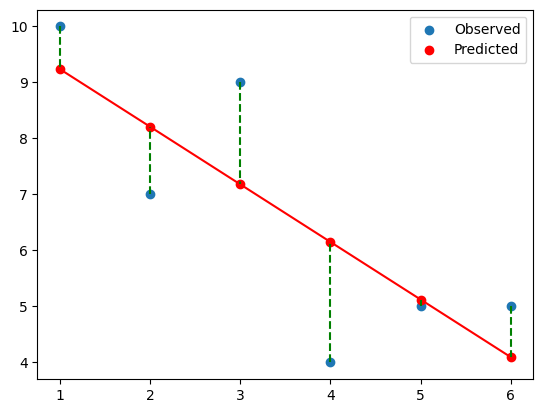

In [6]:
X = [1, 2, 3, 4, 5, 6]
Y = [10, 7, 9, 4, 5, 5]
Y_predicted = [9.238, 8.21, 7.181, 6.152, 5.124, 4.095]

plt.scatter(X, Y, label = 'Observed')
plt.scatter(X, Y_predicted, color = 'red', label = 'Predicted')
plt.plot(X, Y_predicted, color = 'red')

for i in range(len(X)):
    x = [ X[i], X[i] ]
    y = [ Y[i], Y_predicted[i] ]
    plt.plot(x, y, linestyle = '--', color = 'green')

plt.legend()
plt.show()

By comparing the curves, we will choose the one for which the distances marked by the green lines are **the smallest**.

# Methods for Measuring Curve Fit to Data

We can calculate some statistical methods to determine whether the fit is good enough.

* **Residual Sum of Squares**: Represents the **total error** for the fit. In other words, $RSS$ repserents the sum of the distances between the observed and predicted values. $$RSS = \sum_{i = 0}^{n-1}{\big( Y_{\text{observed}}[i] - Y_{\text{predicted}}[i] \big)^2 }$$

* **Mean Square Error**: Represents **average error** for the fit. $MSE$ is useful for comparing two different models for the same data. The smaller $MSE$, the better curve is fitted. But for large errors this measurement can be extremally bigger than it really matters for us. $$MSE = \frac{\sum_{i = 0}^{n-1}{\big( Y_{\text{observed}}[i] - Y_{\text{predicted}}[i] \big)^2 }}{n} = \frac{RSS}{n}$$

* **Coefficient of Determination** $R^2$: Shows how good is the fit. $R^2$ is intended to capture the proportion of variability in a dataset that is accounted for by the statistical model provided by the fit. If $R^2 = 1$, then we got perfect fit. If $R^2 = 0$, then no data changes are explained. $$R^2 = 1 - \frac{\sum_{i = 0}^{n-1}{\big( Y_{\text{observed}}[i] - Y_{\text{predicted}}[i] \big)^2 }}{\sum_{i = 0}^{n-1}{\big( Y_{\text{observed}}[i] - Mean(Y) \big)^2 }} = 1 - \frac{RSS}{n \times Variance(Y)}$$

In [7]:
def residual_sum_of_squares(y_observed: list, y_predicted: list) -> float:
    """Calculates the residual sum of squared of the fit for the two-dimentional dataset containing pairs of numbers (integers or/and floats).
       
       Represents the total error for the fit. In other words, `RSS` repserents the sum of the distances between the observed
       and predicted values."""

    if not len(y_observed) == len(y_predicted):
        print('Invalid input!')
    else:
        counter = 0
        
        for i in range(len(y_observed)):
            counter = counter + ((y_observed[i] - y_predicted[i]) ** 2)
        
        return counter


def rss(y_observed: list, y_predicted: list) -> float:
    """Calculates the residual sum of squared of the fit for the two-dimentional dataset containing pairs of numbers (integers or/and floats).
       
       Represents the total error for the fit. In other words, `RSS` repserents the sum of the distances between the observed
       and predicted values."""
    
    return residual_sum_of_squares(y_observed, y_predicted)


def mean_square_error(y_observed: list, y_predicted: list) -> float:
    """Calculates the mean square of the two-dimentional dataset containing pairs of numbers (integers or/and floats).
    
       Represents average error for the fit. `MSE` is useful for comparing two different models for the same data. The smaller `MSE`, 
       the better curve is fitted.
       
       But for large errors this measurement can be extremally bigger than it really matters for us."""

    if not len(y_observed) == len(y_predicted):
        print('Invalid input!')
    else:
        return residual_sum_of_squares(y_observed, y_predicted) / len(y_observed)


def mse(y_observed: list, y_predicted: list) -> float:
    """Calculates the mean square of the two-dimentional dataset containing pairs of numbers (integers or/and floats).
    
       Represents average error for the fit. `MSE` is useful for comparing two different models for the same data. The smaller `MSE`, 
       the better curve is fitted.
       
       But for large errors this measurement can be extremally bigger than it really matters for us."""

    return mean_square_error(y_observed, y_predicted)


def coefficient_of_determination(y_observed: list, y_predicted: list) -> float:
    """Calculates the coefficient of determination of the fit for the two-dimentional dataset containing pairs of numbers 
       (integers or/and floats).
    
       `R^2`: Shows how good is the fit. `R^2` is intended to capture the proportion of variability in a dataset that is 
       accounted for by the statistical model provided by the fit.
       
       If `R^2 = 1`, then we got perfect fit. If `R^2 = 0`, then no data changes are explained."""

    if not len(y_observed) == len(y_predicted):
        print('Invalid input!')
    else:
        return 1 - (residual_sum_of_squares(y_observed, y_predicted) / (lds.variance(y_observed) * len(y_observed)))


def r_square(y_observed: list, y_predicted: list) -> float:
    """Calculates the coefficient of determination of the fit for the two-dimentional dataset containing pairs of numbers 
       (integers or/and floats).
    
       `R^2`: Shows how good is the fit. `R^2` is intended to capture the proportion of variability in a dataset that is 
       accounted for by the statistical model provided by the fit.
       
       If `R^2 = 1`, then we got perfect fit. If `R^2 = 0`, then no data changes are explained."""

    return coefficient_of_determination(y_observed, y_predicted)

For example, we got the dataset, where $X = \text{ordinal numbers of apartments}$ and $Y = \text{prices in thousands}$.

* $MSE = 25$: Means that real prices and predicted prices differ in 5 thousands in average.

* $R^2 = 0.9$: Means that the chosen model explains $90\%$ of the real prices.

I'll go back to the initial data for a moment. I'll try to determine which model fits best.

In [8]:
# Dataset
X = np.linspace(-10, 10, 30)
Y = 3 * X**2 + 2 * X + 5 + np.random.normal(0, 10, 30)

# Predictions
Y_1 = [ 30 * x for x in X ]
Y_2 = [ -25 * x + 5 for x in X ]
Y_3 = [ 150 for x in X ]
Y_4 = [ 2 * x ** 2 + 3 * x + 15 for x in X ]
Y_5 = [ 3 * x ** 2 + 2 * x + 5 for x in X ]

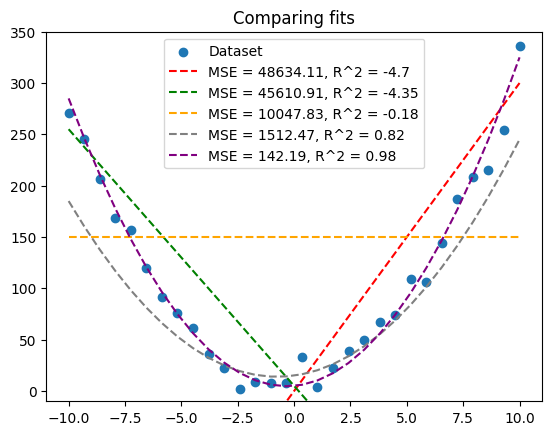

In [9]:
plt.scatter(X, Y, label = 'Dataset')
plt.plot(X, Y_1, color = 'red', linestyle = '--', label = f'MSE = {np.round(mse(Y, Y_1), 2)}, R^2 = {np.round(r_square(Y, Y_1), 2)}')
plt.plot(X, Y_2, color = 'green', linestyle = '--', label = f'MSE = {np.round(mse(Y, Y_2), 2)}, R^2 = {np.round(r_square(Y, Y_2), 2)}')
plt.plot(X, Y_3, color = 'orange', linestyle = '--', label = f'MSE = {np.round(mse(Y, Y_3), 2)}, R^2 = {np.round(r_square(Y, Y_3), 2)}')
plt.plot(X, Y_4, color = 'gray', linestyle = '--', label = f'MSE = {np.round(mse(Y, Y_4), 2)}, R^2 = {np.round(r_square(Y, Y_4), 2)}')
plt.plot(X, Y_5, color = 'purple', linestyle = '--', label = f'MSE = {np.round(mse(Y, Y_5), 2)}, R^2 = {np.round(r_square(Y, Y_5), 2)}')
plt.title('Comparing fits')
plt.legend()
plt.ylim([-10, 350])
plt.show()

As we can see, the first three models do not reflect our data in any way, because $R^2 < 0$.

On the other hand, the models described by a quadratic function performed very well. Of course, the one shown in purple performed the best, as it is described by exactly the same function that allowed me to create this dataset.

### Variance versus Mean Square Error

* **Variance** describes the spread around the mean of one-dimentional data.

* **Mean Square Error** refers to the model's error in the context of predicting actual values to fit the curve.

### Mean Square Error versus Coefficient of Determination $R^2$

* **Mean Square Error** is used when you want an absolute measure of error in the same unit as the dependent variable, and when conparing different models on the same dataset.

* **Coefficient of Determination** $R^2$ is used when you are interested in a percentage measure of explained variability, and when the goal is a general interpretation of model fit quality rather than a specific error magnitude.

# Linear Regression

Find the factorials of the polynomial to compute $Y_{\text{predicted}}$ that the squared difference of $Y_{\text{predicted}}$ and the corresponding $Y_{\text{observed}}$ is minimized.

### Example for a linear function

An example of a linear function is $y=ax+b$. $$a = \frac{\sum_{i=0}^{n-1}\big[ (X[i] - Mean(X))(Y[i] - Mean(Y)) \big]}{\big[ X[i] - Mean(X)\big]^2 }, \quad b = Mean(Y) - a \times Mean(X)$$

### Linear Regression in Python

* To determine the coefficients for our curve, we will use `np.polyfit(X: list, Y: list, n: float)`. 

* When we want to create the set $Y_{\text{predicted}}$, we will use `np.polyval(factors: tuple, X: list)`.


In [10]:
X = np.linspace(-10, 10, 30)
Y = 3 * X**2 + 2 * X + 5 + np.random.normal(0, 10, 30)

In [11]:
def linear_regression_test(X, Y, n):
    factors = np.polyfit(X, Y, n)
    Y_predicted = np.polyval(factors, X)

    plt.scatter(X, Y)
    plt.scatter(X, Y_predicted, color = 'red', label = f'R^2 = {r_square(Y, Y_predicted)}')
    plt.plot(X, Y_predicted, color = 'red')

    for i in range(len(X)):
        x = [ X[i], X[i] ]
        y = [ Y[i], Y_predicted[i] ]
        plt.plot(x, y, linestyle = '--', color = 'green')

    plt.legend()
    plt.show()

Example for linear model.

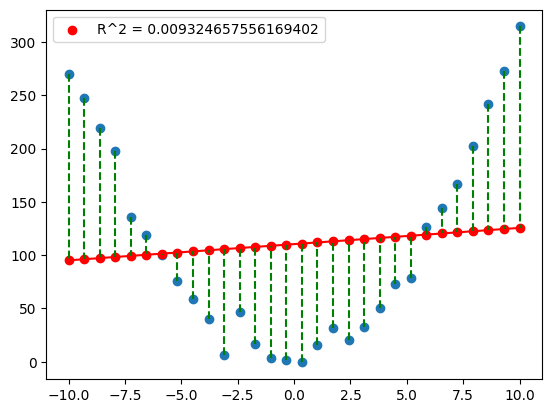

In [12]:
linear_regression_test(X, Y, 1)

Example for quadratic model.

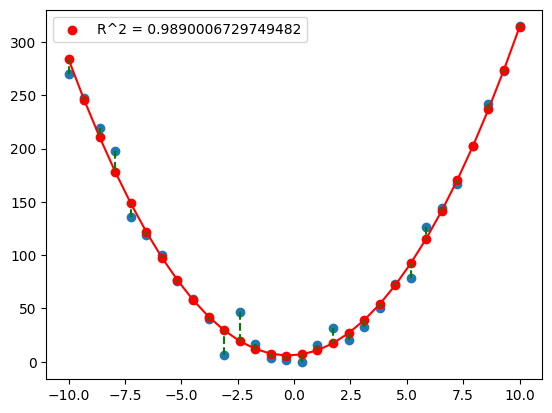

In [13]:
linear_regression_test(X, Y, 2)

Example for cubic model.

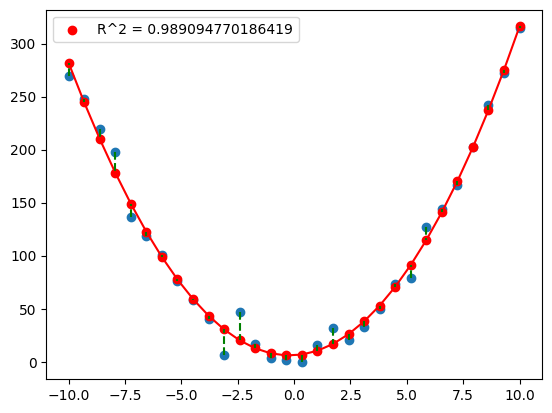

In [14]:
linear_regression_test(X, Y, 3)